In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
state_job_fig = "CSV Files/Total Jobs per State"
total_ind_state = "CSV Files/Total Worker per Category"
state_ind_breakdown = "CSV Files/Manufacturing Jobs by Industry"
combined_cancer = "Cancer Incidence & Death Rates/Resource/Added_final_combined_cancer_data.csv"

In [10]:
state_job_df = pd.read_csv(state_job_fig)
total_ind_df = pd.read_csv(total_ind_state)
st_in_brk_df = pd.read_csv(state_ind_breakdown)
cancer_rate_df = pd.read_csv(combined_cancer)

In [4]:
state_job_ind = state_job_df.set_index("State")
state_job_ind.head(50)

,Workers per State
State,
Alabama,128315
Alaska,3239
Arizona,56602
Arkansas,76421
California,517711
Colorado,53580
Connecticut,49562
Delaware,15705
District of Columbia,840


<Figure size 432x288 with 0 Axes>

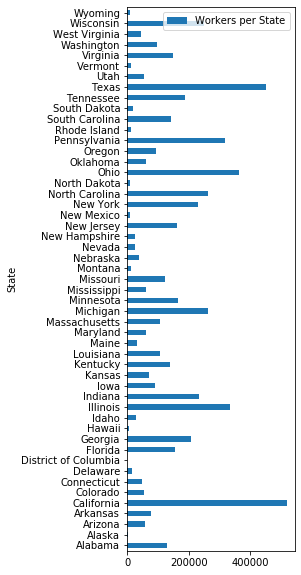

In [5]:
plt.figure()
state_job_ind.plot(kind = "barh",figsize=(3,10))

In [6]:
total_job_total_cancer = pd.merge(state_job_df,cancer_rate_df, on='State')
total_job_total_cancer

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Alabama,128315,451.9,26110.0,179.0,10332.0,39.571046
1,Alaska,3239,413.0,2784.0,164.9,977.0,35.093391
2,Arizona,56602,387.0,30448.0,144.1,11508.0,37.795586
3,Arkansas,76421,467.8,16551.0,185.2,6623.0,40.015709
4,California,517711,404.8,165242.0,145.3,58588.0,35.455877
5,Colorado,53580,401.4,22701.0,138.9,7520.0,33.126294
6,Connecticut,49562,472.4,20843.0,145.8,6657.0,31.938780
7,Delaware,15705,498.4,5803.0,169.6,1989.0,34.275375
8,District of Columbia,840,432.6,2818.0,169.0,1082.0,38.396026
9,Florida,153757,451.9,121916.0,152.6,43285.0,35.503954


Text(0.5, 0, 'Total Manufacturing Employees')

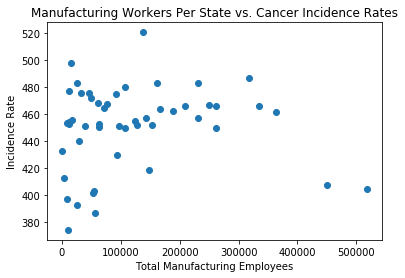

In [22]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

Text(0.5, 0, 'Total Manufacturing Employees')

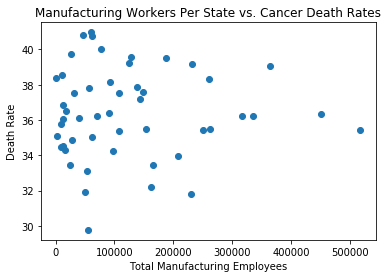

In [25]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"])

plt.title("Manufacturing Workers Per State vs. Cancer Death Rates")
plt.ylabel("Death Rate")
plt.xlabel("Total Manufacturing Employees")

In [26]:
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")


The pearson correlation between Workers per State and Cancer Death Rate is 0.01


In [8]:
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Indicence Rate is {round(correlation[0],2)}")



The pearson correlation between both factors is 0.06


In [27]:
#industries_states = st_in_brk_df.groupby(["State"])
st_in_brk_df.head()

,Job Category,People Employed,State,Year,NAICS Code
0,Basic chemical manufacturing,4474,New Jersey,2016,3251
1,Basic chemical manufacturing,7003,Ohio,2016,3251
2,Basic chemical manufacturing,4631,New York,2016,3251
3,Basic chemical manufacturing,820,New Mexico,2016,3251
4,Basic chemical manufacturing,2363,Missouri,2016,3251


In [30]:
#capomulin = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]


petro_coal_manu = st_in_brk_df.loc["Job Category"]=="Petroleum and coal products manufacturing"


KeyError: 'Job Category'